# Twitter Dogs Rate

## 数据收集

In [48]:
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
#引入绘图风格
import matplotlib.style as psl

print(psl.available)

psl.use('ggplot')
print('finished')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']
finished


In [2]:
os.listdir('./data')

['twitter-archive-enhanced.txt',
 'twitter_archive_master.csv',
 'image-predictions.tsv',
 'tweet_json.txt']

In [3]:
twitter_archive = pd.read_csv('data/twitter-archive-enhanced.txt')
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1912,674394782723014656,NaN,NaN,2015-12-09 01:07:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He's a hide and seek champion. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674394782...,8,10,Gary,None,None,None,None
1442,696754882863349760,NaN,NaN,2016-02-08 17:58:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reptar. He specifically asked for his ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696754882...,10,10,Reptar,None,None,None,None
481,815639385530101762,NaN,NaN,2017-01-01 19:22:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. His nose is quite chilly. Reque...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815639385...,12,10,Titan,None,None,None,None


In [4]:
# 如果没有目录，创建目录
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [ ]:
#通过Requests获取数据
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
if response.status_code == 200:
    #将内容写入文件
    with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as f:
        f.write(response.content)
        

In [4]:
#读取图片预测结果数据集
image_predict = pd.read_csv('data/image-predictions.tsv',sep='\t')
image_predict.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1224,744971049620602880,https://pbs.twimg.com/media/ClarNU8VAAEDrDt.jpg,1,toy_poodle,0.497755,True,golden_retriever,0.282017,True,miniature_poodle,0.090032,True
571,678399652199309312,https://pbs.twimg.com/ext_tw_video_thumb/67839...,1,swing,0.929196,False,Bedlington_terrier,0.015047,True,Great_Pyrenees,0.014039,True
606,679877062409191424,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,1,hog,0.809466,False,hay,0.060178,False,lumbermill,0.016483,False


- tweet_id 是推特链接的最后一部分，位于 "status/" 后面 → https://twitter.com/dog_rates/status/889531135344209921
- jpg_url 是预测的图像资源链接
- img_num 最可信的预测结果对应的图像编号 → 1 推特中的第一张图片
- p1 是算法对推特中图片的一号预测 → 金毛犬
- p1_conf 是算法的一号预测的可信度 → 95%
- p1_dog 是一号预测该图片是否属于“狗”（有可能是其他物种，比如熊、马等） → True 真
- p2 是算法对推特中图片预测的第二种可能性 → 拉布拉多犬
- p2_conf 是算法的二号预测的可信度 → 1%
- p2_dog 是二号预测该图片是否属于“狗” → True 真
...以此类推

In [5]:
#读取twitter api 返回文件 转发数（retweet count）和喜爱数（favorite count）
df_list = []
with open ('data/tweet_json.txt') as file:
    line = file.readline()
    while line:
        json_str = json.loads(line)
        #id , 转发数,喜爱数
        tweet_id = json_str['id_str']
        retweet_count = json_str['retweet_count']
        favorite_count = json_str['favorite_count']
        df_list.append({
            'tweet_id':tweet_id,
            'retweet_count': retweet_count,
            'favorite_count': favorite_count
        })
        line = file.readline()
        
tweet_data = pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count'])

In [6]:
tweet_data.sample(3)

,tweet_id,retweet_count,favorite_count
1436,696886256886657024,2001,5285
1938,673711475735838725,324,1112
846,765719909049503744,2461,7990


## 数据评估
数据质量评估体系主要参考以下指标：

- 数据完整性
- 数据准确性
- 数据有效性
- 数据时效性
- 数据一致性

In [7]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 存在缺失的列
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id           
- retweeted_status_user_id
- retweeted_status_timestamp    
- expanded_urls 

In [7]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


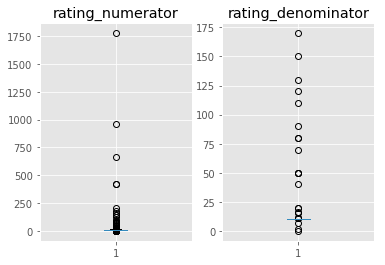

In [8]:
#箱图
fig, ((ax1, ax2)) = plt.subplots(1, 2)
ax1.set(title='rating_numerator')
ax2.set(title='rating_denominator')

ax1.boxplot(twitter_archive['rating_numerator'])
ax2.boxplot(twitter_archive['rating_denominator']);
#sns.boxplot(data=twitter_archive,x="rating_numerator")
#sns.boxplot(data=twitter_archive,x="rating_denominator")

In [52]:
#查看rating_numerator = 1000的记录
twitter_archive.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [20]:
#观察name项为a an the 
twitter_archive.query('name == "a" or name == "an" or name == "the" ').shape

(70, 17)

In [13]:
image_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_predict[image_predict.jpg_url.duplicated() == True].shape

(66, 12)

In [12]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### 质量
#### `twitter_archive` 表格
- rating_numerator 存在异常值，max=1776
- source 中还保留了a标签
- 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' 缺失值过多，且对此次分析无影响，可以删除相关列
- 一部分name中值为`a` `an` `the`
- expanded_urls 存在缺失

#### `image_predict` 表格
- jpg_url 有66个重复值

#### `tweet_data` 表格
- tweet_id 应与前两个表的类型一致，为int64

### 清洁度
- `twitter_archive`表中`timestamp`字段需要处理成常用日期格式 yyyy-MM-dd hh:mi:ss
- `twitter_archive`表中doggo,floofer,pupper,puppo都属于'stage'，应该合并成一列

### 编码

In [9]:
# 处理twitter_archive 数据
# 备份数据
twitter_archive_clean = twitter_archive.copy()

In [10]:
# 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 
#'retweeted_status_user_id','retweeted_status_timestamp' 确实值过多，且对此次分析无影响，可以删除
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id',
                                                 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#test
twitter_archive_clean.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [11]:
# rating_numerator 存在异常值，max=1776
idx = twitter_archive_clean.query('rating_numerator == 1776').index[0]
#删除该项
twitter_archive_clean.drop(index=idx, axis=0, inplace=True)

In [12]:
#test
twitter_archive_clean.query('rating_numerator == 1776').shape[0] == 0

True

In [13]:
#expanded_urls 存在缺失 删除空值
twitter_archive_clean.dropna(subset=(['expanded_urls']), axis=0, inplace=True)
#test
twitter_archive_clean[twitter_archive_clean.expanded_urls.isna() == True].shape[0] == 0

True

In [14]:
# 将一部分name中值为a an the 替换成 None
replace_lst = ('a','an','the','None')
for name in replace_lst:
    twitter_archive_clean.replace(name,np.nan,inplace=True)

#test
twitter_archive_clean.name.value_counts()

Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
Sadie        8
Bailey       7
Daisy        7
Buddy        7
Toby         7
Leo          6
Rusty        6
Jack         6
Scout        6
Oscar        6
Stanley      6
Dave         6
Bella        6
Koda         6
Jax          6
Milo         6
Gus          5
Phil         5
Finn         5
Bentley      5
very         5
            ..
Billl        1
Walker       1
Duchess      1
Stu          1
Dido         1
Jerome       1
Edgar        1
Stefan       1
Reagan       1
Ridley       1
Shiloh       1
Pubert       1
Hermione     1
Remy         1
Jed          1
Mack         1
Ole          1
his          1
Stewie       1
Peanut       1
Cannon       1
Zeek         1
Samsom       1
Skittles     1
Livvie       1
Coopson      1
Grady        1
old          1
BeBe         1
Taz          1
Name: name, Length: 953, dtype: int64

In [15]:
#source 中还保留了a标签,用正则表达式去除a标签
#twitter_archive_clean.source.loc[:0][0]
#<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
#不能重复运行，否则数据会被覆盖成空值
import re
twitter_archive_clean['source'] = twitter_archive_clean.source.str.extract('>(.*)<',re.S,expand = True)

In [16]:
#test
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                10
Name: source, dtype: int64

In [17]:
#备份
image_predict_clean = image_predict.copy()
tweet_data_clean = tweet_data.copy()

In [18]:
#image_predict表 jpg_url 有66个重复值
image_predict_clean.drop_duplicates(subset=['jpg_url'],inplace=True)
#test
image_predict_clean[image_predict_clean.jpg_url.duplicated() == True].shape[0] == 0

True

In [19]:
#tweet_data tweet_id 应与前两个表的类型一致，为int64
tweet_data_clean['tweet_id'] = tweet_data_clean.tweet_id.astype(int)
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### 清洁度
- twitter_archive表中timestamp字段需要处理成常用日期格式 yyyy-MM-dd hh:mi:ss
- twitter_archive表中doggo,floofer,pupper,puppo都属于'stage'，应该合并成一列

In [20]:
#格式化日期
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.timestamp[:1][0]

Timestamp('2017-08-01 16:23:56')

In [21]:
#twitter_archive表中doggo,floofer,pupper,puppo都属于'stage'，应该合并成一列
twitter_archive_clean['stage'] = twitter_archive_clean.text.str.lower().str.findall(r'(doggo|floof|pupper|puppo)')
#去重
twitter_archive_clean['stage'] = twitter_archive_clean.stage.apply(lambda x : set(x)).apply(lambda x:','.join(x))
#将空值转换成NaN
twitter_archive_clean['stage'] = twitter_archive_clean.stage.replace('',np.nan)
#删除多余的列
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace = True)



In [36]:
twitter_archive_clean.stage.value_counts()

pupper          268
doggo            87
floof            37
puppo            33
pupper,doggo     12
floof,doggo       3
puppo,doggo       2
pupper,floof      1
Name: stage, dtype: int64

In [22]:
# 通过tweeter_id 合并三个数据集 twitter_archive_clean, image_predict_clean, tweet_data_clean
df_clean = twitter_archive_clean.merge(image_predict_clean, how = 'inner', on='tweet_id')

In [23]:
df_clean = df_clean.merge(tweet_data_clean, how = 'left', on = 'tweet_id')

In [39]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016


In [193]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [24]:
# 数据存储到twitter_archive_master.csv
df_clean.to_csv('data/twitter_archive_master.csv', index=False)

## 数据分析及可视化

In [25]:
df = pd.read_csv('data/twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 22 columns):
tweet_id              2008 non-null int64
timestamp             2008 non-null object
source                2008 non-null object
text                  2008 non-null object
expanded_urls         2008 non-null object
rating_numerator      2008 non-null int64
rating_denominator    2008 non-null int64
name                  1379 non-null object
stage                 373 non-null object
jpg_url               2008 non-null object
img_num               2008 non-null int64
p1                    2008 non-null object
p1_conf               2008 non-null float64
p1_dog                2008 non-null bool
p2                    2008 non-null object
p2_conf               2008 non-null float64
p2_dog                2008 non-null bool
p3                    2008 non-null object
p3_conf               2008 non-null float64
p3_dog                2008 non-null bool
retweet_count         2008 non-null int64

### 通过喜爱数分析大众喜爱的狗种类

In [81]:
#根据p1预测为True，得到数据
df_dog = df[df.p1_dog == True]
df_dog.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3240,20548
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2142,12053


In [82]:
#根据p1 获取狗种类
df_dog['p1'] = df_dog.p1.str.capitalize()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
df_dog['p1'].value_counts()

Golden_retriever               139
Labrador_retriever              95
Pembroke                        88
Chihuahua                       79
Pug                             55
Chow                            41
Samoyed                         40
Pomeranian                      38
Toy_poodle                      38
Malamute                        29
Cocker_spaniel                  27
French_bulldog                  26
Chesapeake_bay_retriever        23
Miniature_pinscher              22
German_shepherd                 20
Siberian_husky                  20
Staffordshire_bullterrier       19
Shetland_sheepdog               18
Eskimo_dog                      18
Maltese_dog                     18
Shih-tzu                        17
Rottweiler                      17
Cardigan                        17
Beagle                          17
Lakeland_terrier                16
Kuvasz                          16
Italian_greyhound               16
West_highland_white_terrier     14
Great_pyrenees      

In [84]:
#根据预测的狗种类分类汇总喜爱数
df_fav = df_dog[['p1','favorite_count']].groupby(['p1']).sum()
df_fav.head()

,favorite_count
p1,
Afghan_hound,51752
Airedale,63108
American_staffordshire_terrier,97867
Appenzeller,14632
Australian_terrier,22177


In [85]:
#获取喜爱数前10的狗种类
df_fav_top10 = df_fav.sort_values(by = ['favorite_count'], ascending=False)[0:10]
df_fav_top10.head()

,favorite_count
p1,
Golden_retriever,1707334
Labrador_retriever,1119555
Pembroke,991762
Chihuahua,673987
Samoyed,541345


Text(0.5, 0, '喜爱数')

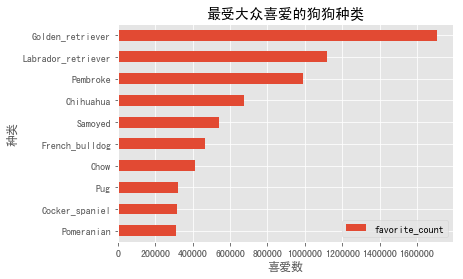

In [86]:
df_fav_top10.sort_values(by = ['favorite_count'], ascending=True).plot(kind = 'barh',title='最受大众喜爱的狗狗种类')
plt.ylabel('种类')
plt.xlabel('喜爱数')

#### 结论
金毛、拉布拉多、柯基深受大家喜爱，获得的点赞数很高。

### 通过转发数分析大众意向分享的狗狗种类

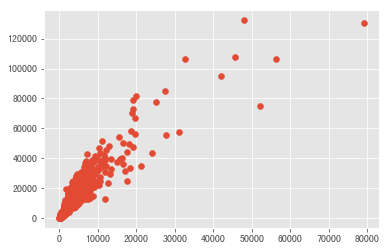

In [63]:
# 分析点赞数和转发数的关系
plt.scatter(df_fav_dog['retweet_count'],df_fav_dog['favorite_count']);

#### 上图可以看书转发数和喜爱数关联性很强，所以可以推断转发数高的狗狗种类也应该是金毛、拉布拉多、柯基。下面进行验证

In [87]:
#根据预测的狗种类分类汇总喜爱数
df_retweet = df_dog[['p1','retweet_count']].groupby(['p1']).sum()
df_retweet.head()

,retweet_count
p1,
Afghan_hound,17838
Airedale,16644
American_staffordshire_terrier,28515
Appenzeller,2898
Australian_terrier,6117


In [88]:
#获取喜爱数前10的狗种类
df_retweet_top10 = df_retweet.sort_values(by = ['retweet_count'], ascending=False)[0:10]
df_retweet_top10.head()

,retweet_count
p1,
Golden_retriever,505153
Labrador_retriever,364632
Pembroke,278975
Chihuahua,219521
Samoyed,183897


Text(0.5, 0, '转发数')

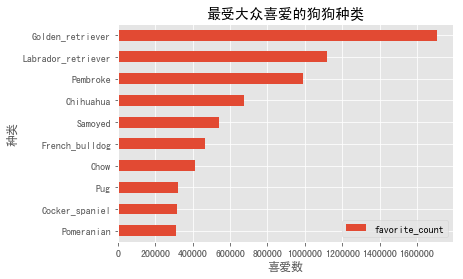

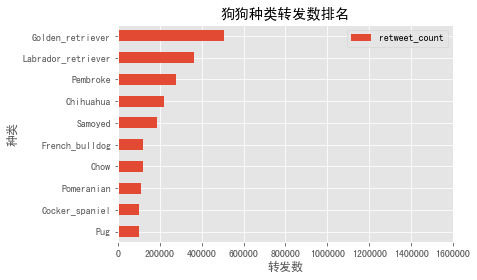

In [110]:
df_fav_top10.sort_values(by = ['favorite_count'], ascending=True).plot(kind = 'barh',title='最受大众喜爱的狗狗种类')
plt.ylabel('种类')
plt.xlabel('喜爱数')

df_retweet_top10.sort_values(by = ['retweet_count'], ascending=True).plot(kind = 'barh',title='狗狗种类转发数排名')
plt.xlim(2,1600000)
plt.ylabel('种类')
plt.xlabel('转发数')

#### 验证了点赞数高的转发数也相对很高

### 分析评分与点赞数关系

In [111]:
df_dog.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3240,20548
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2142,12053


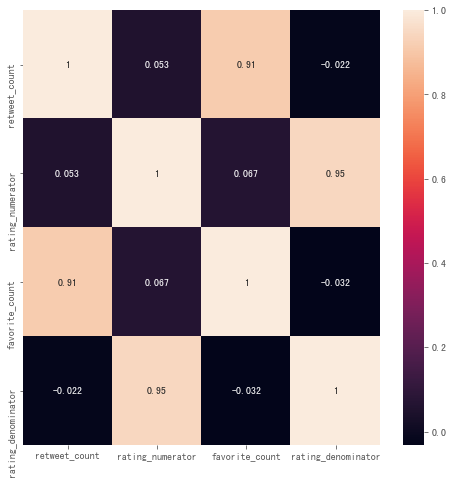

In [117]:
corr = df_dog[['retweet_count','rating_numerator','favorite_count','rating_denominator']].corr()
plt.figure(figsize=(8,8))
# annot=True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

#### 结论
点赞数与评分高低相关性不高

### 分析哪种“地位”的狗狗最多

In [121]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 1 to 2007
Data columns (total 22 columns):
tweet_id              1480 non-null int64
timestamp             1480 non-null object
source                1480 non-null object
text                  1480 non-null object
expanded_urls         1480 non-null object
rating_numerator      1480 non-null int64
rating_denominator    1480 non-null int64
name                  1062 non-null object
stage                 277 non-null object
jpg_url               1480 non-null object
img_num               1480 non-null int64
p1                    1480 non-null object
p1_conf               1480 non-null float64
p1_dog                1480 non-null bool
p2                    1480 non-null object
p2_conf               1480 non-null float64
p2_dog                1480 non-null bool
p3                    1480 non-null object
p3_conf               1480 non-null float64
p3_dog                1480 non-null bool
retweet_count         1480 non-null int64

In [122]:
#stage为空的数量
df_dog.stage.isnull().sum()

1203

In [123]:
#查看stage值
df_dog.stage.value_counts()

pupper          160
doggo            48
floof            33
puppo            24
doggo,pupper      8
doggo,puppo       2
floof,pupper      1
doggo,floof       1
Name: stage, dtype: int64

In [131]:
stage_count = df_dog.stage.str.split(',',expand=True).stack().value_counts()
stage_count

pupper    169
doggo      59
floof      35
puppo      26
dtype: int64

```python
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

```

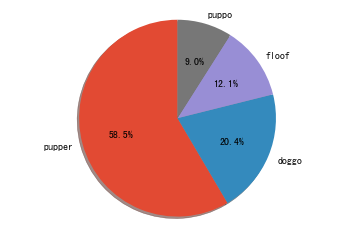

In [140]:
labels = stage_count.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(stage_count, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');

#### 结论
可以看出pupper占比最高